In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
from load import WESAD
import pandas as pd
from collections import Counter
import feature as feat

In [2]:
wesad,fs =  WESAD(),7500
ecg_signal = wesad.df['ECG'][:fs]

Finished building DataFrame


In [3]:
rolling_data = wesad.rolling_window(ecg_signal,window_size=7000)

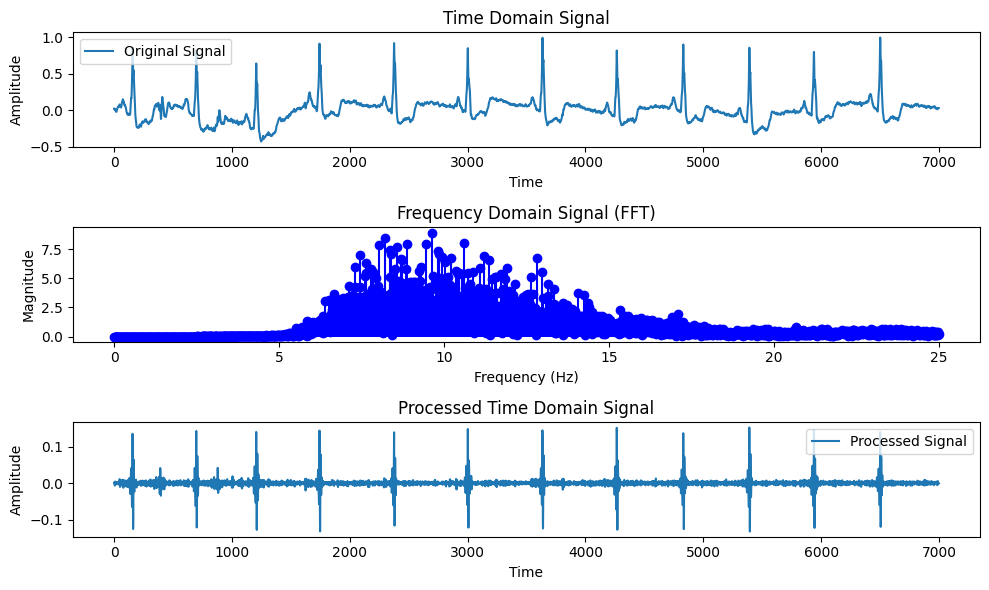

In [4]:
time_signal = rolling_data[0]
decorator = feat.SignalDecorator(time_signal)
decorator.add_processor(feat.ButterBandpass(), lowcut=5, highcut=30, fs=70)
decorator.add_processor(feat.FFTProcessor())
processed_signal, results = decorator.apply()
# 繪圖
visualizer = feat.SignalVisualizer(time_signal, time_step=1/len(time_signal))
visualizer.plot(processed_signal, results)

In [5]:
feats = wesad.feature_extraction(limit=5)
feats

signal length: 5


,ECG_ULF,ECG_LF,ECG_HF,ECG_UHF,std_EMG,mean_EMG,label
0,0.0,0.0,0.0,0.002181,0.013906,-0.002894,1
1,0.0,0.0,0.0,0.002181,0.013906,-0.002899,1
2,0.0,0.0,0.0,0.002181,0.013905,-0.002901,1
3,0.0,0.0,0.0,0.002181,0.013905,-0.002899,1
4,0.0,0.0,0.0,0.002181,0.013908,-0.002902,1


In [ ]:
feats = wesad.mutiT_feature_extraction(limit=5)
feats # 1m 34.4s

signal length: 5
enter window
enter window
enter window
enter window
enter window
{'ECG_ULF': 0.0, 'ECG_LF': 0.0, 'ECG_HF': 0.0, 'ECG_UHF': 0.0021805661852974324, 'std_EMG': 0.013906094890093427, 'mean_EMG': -0.0028943023681640627, 'label': 1}
exit window
{'ECG_ULF': 0.0, 'ECG_LF': 0.0, 'ECG_HF': 0.0, 'ECG_UHF': 0.0021805661852974324, 'std_EMG': 0.013905570125761843, 'mean_EMG': -0.0028986968994140624, 'label': 1}
exit window
{'ECG_ULF': 0.0, 'ECG_LF': 0.0, 'ECG_HF': 0.0, 'ECG_UHF': 0.0021805661852974324, 'std_EMG': 0.013905490756664083, 'mean_EMG': -0.0029006500244140626, 'label': 1}
exit window
{'ECG_ULF': 0.0, 'ECG_LF': 0.0, 'ECG_HF': 0.0, 'ECG_UHF': 0.0021805661852974324, 'std_EMG': 0.013905453349584533, 'mean_EMG': -0.0028988037109375, 'label': 1}
exit window
{'ECG_ULF': 0.0, 'ECG_LF': 0.0, 'ECG_HF': 0.0, 'ECG_UHF': 0.0021805661852974324, 'std_EMG': 0.013908165419047255, 'mean_EMG': -0.0029022064208984377, 'label': 1}
exit window


,ECG_ULF,ECG_LF,ECG_HF,ECG_UHF,std_EMG,mean_EMG,label
0,0.0,0.0,0.0,0.002181,0.013906,-0.002894,1
1,0.0,0.0,0.0,0.002181,0.013906,-0.002899,1
2,0.0,0.0,0.0,0.002181,0.013905,-0.002901,1
3,0.0,0.0,0.0,0.002181,0.013905,-0.002899,1
4,0.0,0.0,0.0,0.002181,0.013908,-0.002902,1


In [7]:
import multiprocessing
print(multiprocessing.cpu_count())

20
